In [1]:
import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import pandas as pd
import seaborn as sns

from scipy.optimize import curve_fit

import matplotlib.ticker as ticker

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

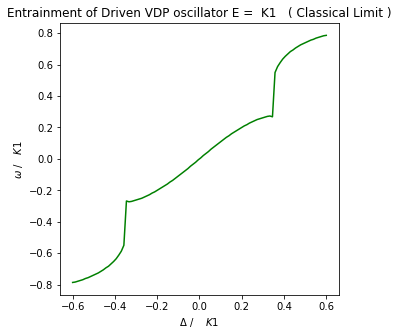

In [7]:
N = 30
a = destroy( N )
k1 = 1
g1 = 0
g2 = (0.05) * k1 
epsilon = k1 - g1 

Ac = np.sqrt ( epsilon / g2  )

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
c4 = np.sqrt(g2) * momentum(N)* a
Collapse = [ c1 , c2 , c3 , c4 ]

E = 2 * k1 
d_range = np.linspace(-0.6,0.6,100)
wlist = np.linspace(-2, 2, 10000) * 2 * np.pi
frequency_list_classical = []

for d in d_range:
    
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())
    
    spec = spectrum(H, wlist, Collapse, a.dag(), a)

    W_observed = wlist[spec.argmax()]
    
    frequency_list_classical.append(W_observed)
    
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_classical , 'g' )
plt.title("Entrainment of Driven R oscillator E =  K1   ( Classical Limit )")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')

# This produced a plot for the Rayleigh oscillator in the classical limit where g2 = 0.05 k1 

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

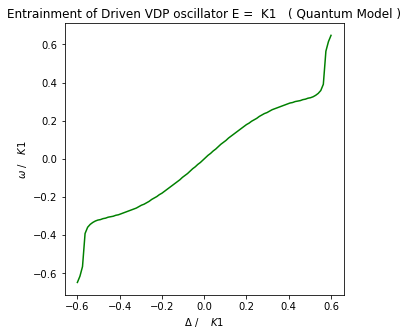

In [11]:
N = 20
a = destroy( N )
k1 = 1
g1 = 0
g2 = (0.1) * k1 
epsilon = k1 - g1 

Ac = np.sqrt ( epsilon / g2  )

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
c4 = np.sqrt(g2) * momentum(N)* a
Collapse = [ c1 , c2 , c3 , c4 ]


E = 2 * k1 
d_range = np.linspace(-0.6,0.6,100)
wlist = np.linspace(-2, 2, 10000) * 2 * np.pi
frequency_list_quantum = []

for d in d_range:
    
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())
    
    spec = spectrum(H, wlist, Collapse, a.dag(), a)

    W_observed = wlist[spec.argmax()]
    
    frequency_list_quantum.append(W_observed)
    
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_quantum , 'g' )
plt.title("Entrainment of Driven R oscillator E =  K1   ( Quantum Model )")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')
# This produced a plot of the Rayleigh oscillator for a quantum model, yet not in the quantum limit where k2 is much larger than k1

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

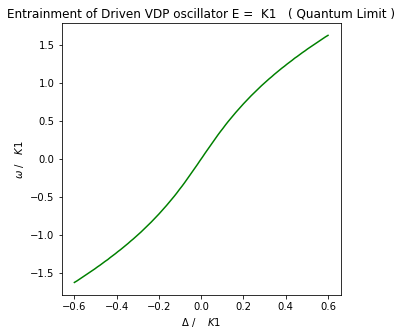

In [12]:
N = 30
a = destroy( N )
k1 = 1
g1 = 0
g2 = (20) * k1 
epsilon = k1 - g1 

Ac = np.sqrt ( epsilon / g2  )

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
c4 = np.sqrt(g2) * momentum(N)* a
Collapse = [ c1 , c2 , c3 , c4 ]


E = 2 * k1 
d_range = np.linspace(-0.6,0.6,100)
wlist = np.linspace(-2, 2, 10000) * 2 * np.pi
frequency_list_quantum_limit = []

for d in d_range:
    
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())
    
    spec = spectrum(H, wlist, Collapse, a.dag(), a)

    W_observed = wlist[spec.argmax()]
    
    frequency_list_quantum_limit.append(W_observed)
    
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_quantum_limit , 'g' )
plt.title("Entrainment of Driven R oscillator E =  K1   ( Quantum Limit )")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')

# This produced a plot for the Rayleigh Oscillator in the quanutm limit where k2 = 20 k1

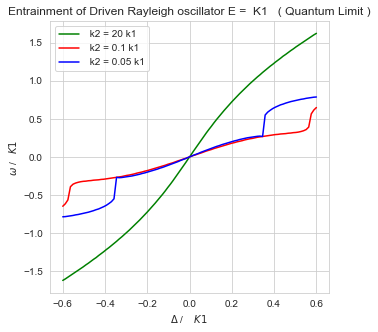

In [16]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_quantum_limit , 'g' , label = ' k2 = 20 k1' )
axes.plot(d_range , frequency_list_quantum , 'r' , label = ' k2 = 0.1 k1')
axes.plot(d_range , frequency_list_classical , 'b', label = ' k2 = 0.05 k1')
plt.title("Entrainment of Driven Rayleigh oscillator E =  K1   ( Quantum Limit )")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')
plt.legend()

# We can see that the classical limit is less susceptible to synchronisation than the quantum case.
# Neither fully synchronises due to the quantum noise etc...
# The quantum limit shows no sign of entrainment or a synchronisation region as expected.

# This concludes our investigation of the driven quantum limit cycles etc we can now consider coupled oscillators.

In [17]:
np.save('R Observed freq vs detuning k2 = 0.05k1 ',frequency_list_classical)
np.save('R Observed freq vs detuning k2 = 0.1k1 ',frequency_list_quantum)
np.save('R Observed freq vs detuning k2 = 20k1 ',frequency_list_quantum_limit)

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

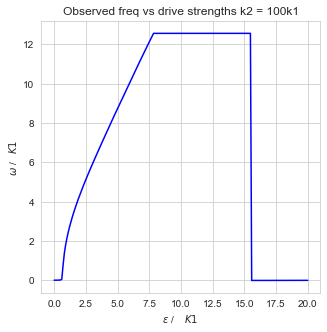

In [53]:
N =  5
a = destroy(N)

k1 = 1
g1 = 0
g2 =  100 * k1 
epsilon = k1 - g1 

Ac = np.sqrt ( epsilon / g2  )

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
c4 = np.sqrt(g2) *  momentum(N) * a 
Collapse = [ c1 , c2 , c3 , c4 ]

d = 0.01 * k1
wlist = np.linspace(-2, 2, 10000) * 2 * np.pi
E_range = np.linspace(0,20,200)
wlist_100k1 = []

for E in E_range:
     
    H = d* k1 *(a.dag() * a) + (E)*(a  + a.dag())

    spec2 = spectrum(H, wlist, Collapse, a.dag(), a)

    W_observed = wlist[spec2.argmax()] 
                                         
    wlist_100k1.append(W_observed)


fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(E_range , wlist_100k1 , 'b' )
plt.title("Observed freq vs drive strengths k2 = 100k1")
plt.xlabel(r'$ \epsilon $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

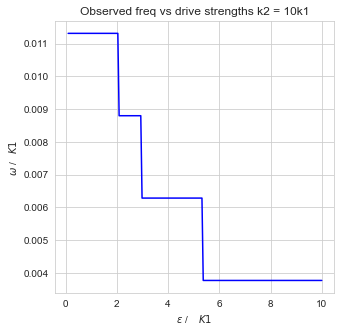

In [35]:
N =  10
a = destroy(N)

k1 = 1
g1 = 0
g2 =  10 * k1 
epsilon = k1 - g1 

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
c4 = np.sqrt(g2) * momentum(N)* a
Collapse = [ c1 , c2 , c3 , c4 ]

d = 0.01 * k1 
E_range = np.linspace(0.1,10,200) # Range of drive strengths.
wlist_10k1 = []
for E in E_range:
     
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())

    wlist2 = np.linspace(-2, 2,10000) * 2 * np.pi
    spec2 = spectrum(H, wlist2, Collapse, a.dag(), a)

    W_observed = wlist2[spec2.argmax()] 
                                         
    wlist_10k1.append(W_observed)


fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(E_range , wlist_10k1 , 'b' )
plt.title("Observed freq vs drive strengths k2 = 10k1")
plt.xlabel(r'$ \epsilon $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

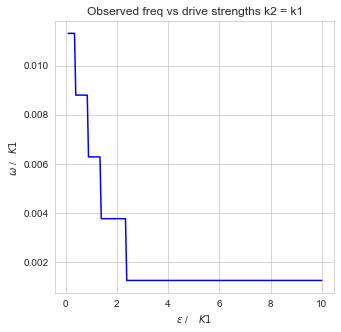

In [36]:
N =  25
a = destroy(N)

k1 = 1
g1 = 0
g2 =  1 * k1 
epsilon = k1 - g1 

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
c4 = np.sqrt(g2) * momentum(N)* a
Collapse = [ c1 , c2 , c3 , c4 ]

d = 0.01 * k1 
E_range = np.linspace(0.1,10,200) # Range of drive strengths.
wlist_1k1 = []
for E in E_range:
     
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())

    wlist2 = np.linspace(-2, 2,10000) * 2 * np.pi
    spec2 = spectrum(H, wlist2, Collapse, a.dag(), a)

    W_observed = wlist2[spec2.argmax()] 
                                         
    wlist_1k1.append(W_observed)


fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(E_range , wlist_1k1 , 'b' )
plt.title("Observed freq vs drive strengths k2 = k1")
plt.xlabel(r'$ \epsilon $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

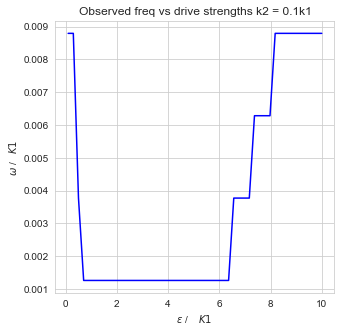

In [44]:
N =  35
a = destroy(N)

k1 = 1
g1 = 0
g2 =  0.1 * k1 
epsilon = k1 - g1 

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
c4 = np.sqrt(g2) * momentum(N)* a
Collapse = [ c1 , c2 , c3 , c4 ]

d = 0.01 * k1 
E_range = np.linspace(0.1,10,50) # Range of drive strengths.
wlist_01k1 = []
for E in E_range:
     
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())

    wlist2 = np.linspace(-2, 2,10000) * 2 * np.pi
    spec2 = spectrum(H, wlist2, Collapse, a.dag(), a)

    W_observed = wlist2[spec2.argmax()] 
                                         
    wlist_01k1.append(W_observed)


fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(E_range , wlist_01k1 , 'b' )
plt.title("Observed freq vs drive strengths k2 = 0.1k1")
plt.xlabel(r'$ \epsilon $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

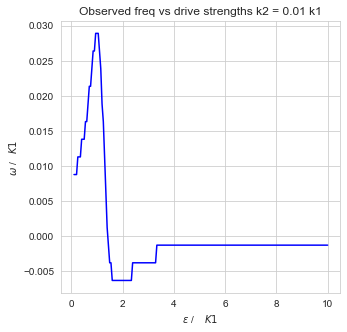

In [39]:
N =  35
a = destroy(N)

k1 = 1
g1 = 0
g2 =  0.01 * k1 
epsilon = k1 - g1 

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
c4 = np.sqrt(g2) * momentum(N)* a
Collapse = [ c1 , c2 , c3 , c4 ]

d = 0.01 * k1 
E_range = np.linspace(0.1,10,200) # Range of drive strengths.
wlist_001k1 = []
for E in E_range:
     
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())

    wlist2 = np.linspace(-2, 2,10000) * 2 * np.pi
    spec2 = spectrum(H, wlist2, Collapse, a.dag(), a)

    W_observed = wlist2[spec2.argmax()] 
                                         
    wlist_001k1.append(W_observed)


fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(E_range , wlist_001k1 , 'b' )
plt.title("Observed freq vs drive strengths k2 = 0.01 k1")
plt.xlabel(r'$ \epsilon $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')

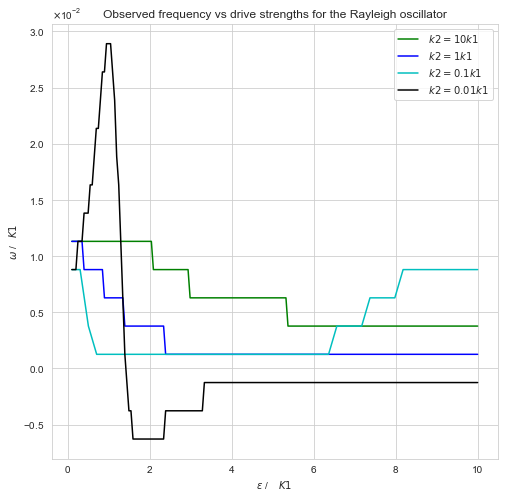

In [54]:
fig, axes = plt.subplots(1, 1, figsize=(8,8))

sns.set_style('whitegrid')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.yaxis.set_major_formatter(formatter)

#axes.plot( np.linspace(0.1,10,200), wlist_100k1 , 'r' , label = r' $k2 = 100 k1 $' )
axes.plot( np.linspace(0.1,10,200), wlist_10k1 , 'g', label = r' $k2 = 10 k1 $' )
axes.plot( np.linspace(0.1,10,200), wlist_1k1 , 'b', label = r' $k2 = 1 k1 $' )
axes.plot( np.linspace(0.1,10,50), wlist_01k1 , 'c' , label = r' $k2 = 0.1 k1 $')
axes.plot( np.linspace(0.1,10,200), wlist_001k1 , 'k', label = r' $k2 = 0.01 k1 $' )
plt.title("Observed frequency vs drive strengths for the Rayleigh oscillator")
plt.xlabel(r'$ \epsilon $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')
plt.legend()